In [2]:
# 1.Import Required Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [5]:
# 2.Load Cleaned Data, Model & Vectorizer
df = pd.read_csv("../data/processed/news_cleaned.csv")
with open("../models/fake_news_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("../models/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

In [6]:
# 3.Prepare Test Data (Same Split as Training)
from sklearn.model_selection import train_test_split
X = df["clean_text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
# 4.Make Predictions
y_pred = model.predict(X_test_tfidf)

In [8]:
# 5.Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9906076722869752


In [9]:
# 6.Classification Report
print(classification_report(
    y_test, 
    y_pred, 
    target_names=["Fake", "Real"]
))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4554
        Real       0.99      0.99      0.99      4283

    accuracy                           0.99      8837
   macro avg       0.99      0.99      0.99      8837
weighted avg       0.99      0.99      0.99      8837



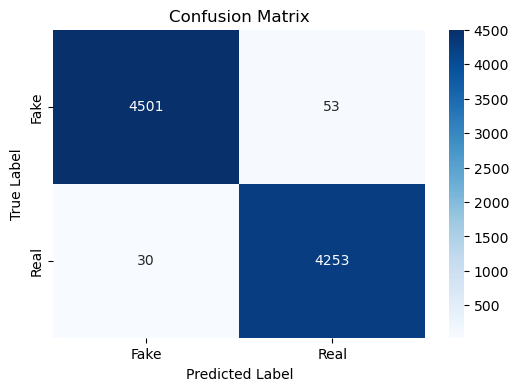

In [10]:
# 7.Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Fake", "Real"],
    yticklabels=["Fake", "Real"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# 8.Error Analysis (IMPORTANT)
error_df = X_test.to_frame()
error_df["true_label"] = y_test.values
error_df["predicted_label"] = y_pred
# False Positives (Fake predicted as Real)
false_positives = error_df[
    (error_df["true_label"] == 0) & (error_df["predicted_label"] == 1)
]
# False Negatives (Real predicted as Fake)
false_negatives = error_df[
    (error_df["true_label"] == 1) & (error_df["predicted_label"] == 0)
]
print("False Positives:", len(false_positives))
print("False Negatives:", len(false_negatives))

False Positives: 53
False Negatives: 30


In [12]:
# 9.Inspect Misclassified Examples
false_positives.head(2)

,clean_text,true_label,predicted_label
21422,u immigration custom enforcement said tuesday ...,0,1
43910,high profile antimass migration member europea...,0,1


In [13]:
false_negatives.head(2)

,clean_text,true_label,predicted_label
8079,los angeles reuters federal appeal court monda...,1,0
21731,new york reuters lawyer republican presidentia...,1,0


#### 📌 Insight:

- FP → Opinionated articles that sound professional
- FN → Factual articles with emotional language


### ✅ STEP 4 OUTPUT (What You Achieved)

- ✔ Evaluated model using multiple metrics
- ✔ Understood classification behavior
- ✔ Analyzed model mistakes
- ✔ Interview-ready explanations